In [1]:
import sys
sys.path.append("..")
%cd ..

/mnt/sdb1/frasos/DTU/Bachelor2021


In [24]:
from DataPrep.load_data import load_data
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from DataPrep.LagCreation import lags
import seaborn as sns
import pyforest

cmap = plt.cm.bone
rmap = plt.cm.Reds

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
df = load_data()
df = df.drop(columns=["Charging Time (mins)","Parking Time (mins)"])
df = df.sort_index()

In [5]:
df.columns

Index(['Label', 'Energy (kWh)', 'Fee (USD)', '# Professional & Other Places',
       '# Food', '# Shop & Service', '# Travel & Transport',
       '# Outdoors & Recreation', '# Arts & Entertainment', '# Nightlife Spot',
       '# Residence', '# College & University', '# Event', 'Plugs', 'Label_0',
       'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6',
       'Label_7', 'Month_Day_1', 'Month_Day_2', 'Month_Day_3', 'Month_Day_4',
       'Month_Day_5', 'Month_Day_6', 'Month_Day_7', 'Month_Day_8',
       'Month_Day_9', 'Month_Day_10', 'Month_Day_11', 'Month_Day_12',
       'Month_Day_13', 'Month_Day_14', 'Month_Day_15', 'Month_Day_16',
       'Month_Day_17', 'Month_Day_18', 'Month_Day_19', 'Month_Day_20',
       'Month_Day_21', 'Month_Day_22', 'Month_Day_23', 'Month_Day_24',
       'Month_Day_25', 'Month_Day_26', 'Month_Day_27', 'Month_Day_28',
       'Month_Day_29', 'Month_Day_30', 'Month_Day_31', 'Week_Day_0',
       'Week_Day_1', 'Week_Day_2', 'Week_Day_3', 'Week_Day_4'

In [4]:
df[df["Fee (USD)"] != 0]

Label  Energy (kWh)  Fee (USD)  # Professional & Other Places  \
Date                                                                        
2017-08-01      1     63.562237  10.830000                             66   
2017-08-01      7     58.557000  14.520000                            242   
2017-08-01      2    109.759000  25.230000                             35   
2017-08-01      6    105.320000  38.110000                            262   
2017-08-01      5    175.310000  46.200000                            267   
...           ...           ...        ...                            ...   
2019-12-31      2     41.778000   9.600000                             35   
2019-12-31      1     93.256000  21.450000                             66   
2019-12-31      0    100.433000  23.100000                            284   
2019-12-31      7     87.979000  20.240000                            242   
2019-12-31      3    111.576710  29.351586                            279   

            # Food  # Shop & Service  # Travel & Transport  \
Date                                                         
2017-08-01      11                16                  15.0   
2017-08-01     199               260                  87.0   
2017-08-01       2                17                   NaN   
2017-08-01     205               270                  75.0   
2017-08-01     215               159                 199.0   
...            ...               ...                   ...   
2019-12-31       2                17                   NaN   
2019-12-31      11                16                  15.0   
2019-12-31     272               230                 218.0   
2019-12-31     199               260                  87.0   
2019-12-31     262               237                 190.0   

            # Outdoors & Recreation  # Arts & Entertainment  # Nightlife Spot  \
Date                                                                            
2017-08-01                       35                       7               NaN   
2017-08-01                       76                      50              57.0   
2017-08-01                       27                      10               NaN   
2017-08-01                       85                      60              53.0   
2017-08-01                      141                     100             114.0   
...                             ...                     ...               ...   
2019-12-31                       27                      10               NaN   
2019-12-31                       35                       7               NaN   
2019-12-31                      174                     129             121.0   
2019-12-31                       76                      50              57.0   
2019-12-31                      150                     136             132.0   

            ...  Year_Month_3  Year_Month_4  Year_Month_5  Year_Month_6  \
Date        ...                                                           
2017-08-01  ...             0             0             0             0   
2017-08-01  ...             0             0             0             0   
2017-08-01  ...             0             0             0             0   
2017-08-01  ...             0             0             0             0   
2017-08-01  ...             0             0             0             0   
...         ...           ...           ...           ...           ...   
2019-12-31  ...             0             0             0             0   
2019-12-31  ...             0             0             0             0   
2019-12-31  ...             0             0             0             0   
2019-12-31  ...             0             0             0             0   
2019-12-31  ...             0             0             0             0   

            Year_Month_7  Year_Month_8  Year_Month_9  Year_Month_10  \
Date                                                                  
2017-08-01             0       

Timestamp('2017-08-01 00:00:00')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

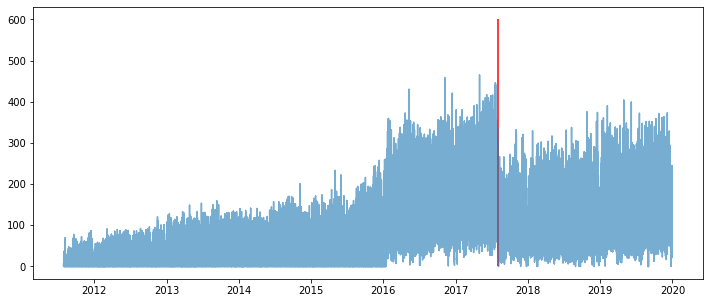

In [9]:
fig = plt.figure(figsize = (12,5))
plt.plot(df["Energy (kWh)"], alpha = 0.6)
plt.vlines(df[df["Fee (USD)"] != 0].index[0], 0, 600, color = "red")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

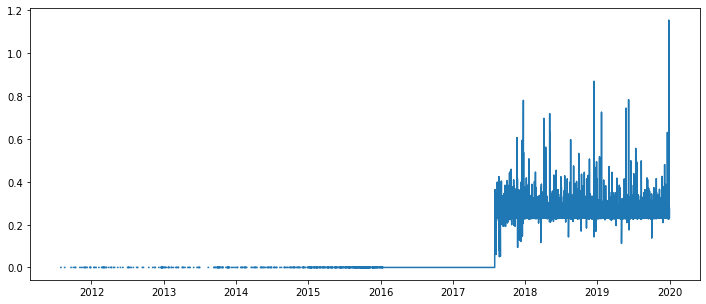

In [10]:
fig = plt.figure(figsize = (12,5))
plt.plot(df["Fee (USD)"]/df["Energy (kWh)"])
plt.show()

In [145]:
df["Fee (USD)"][df["Fee (USD)"] != 0].describe()

count    6179.000000
mean       38.020785
std        24.601901
min         0.940000
25%        19.985000
50%        32.100000
75%        51.526351
max       168.861435
Name: Fee (USD), dtype: float64

In [146]:
np.corrcoef(df["Energy (kWh)"],df["Plugs"])

<IPython.core.display.Javascript object>

array([[1.        , 0.76817393],
       [0.76817393, 1.        ]])

In [147]:
df.columns

Index(['Label', 'Energy (kWh)', 'Fee (USD)', '# Professional & Other Places',
       '# Food', '# Shop & Service', '# Travel & Transport',
       '# Outdoors & Recreation', '# Arts & Entertainment', '# Nightlife Spot',
       '# Residence', '# College & University', '# Event', 'Plugs', 'Label_0',
       'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6',
       'Month_Day_1', 'Month_Day_2', 'Month_Day_3', 'Month_Day_4',
       'Month_Day_5', 'Month_Day_6', 'Month_Day_7', 'Month_Day_8',
       'Month_Day_9', 'Month_Day_10', 'Month_Day_11', 'Month_Day_12',
       'Month_Day_13', 'Month_Day_14', 'Month_Day_15', 'Month_Day_16',
       'Month_Day_17', 'Month_Day_18', 'Month_Day_19', 'Month_Day_20',
       'Month_Day_21', 'Month_Day_22', 'Month_Day_23', 'Month_Day_24',
       'Month_Day_25', 'Month_Day_26', 'Month_Day_27', 'Month_Day_28',
       'Month_Day_29', 'Month_Day_30', 'Month_Day_31', 'Week_Day_0',
       'Week_Day_1', 'Week_Day_2', 'Week_Day_3', 'Week_Day_4', 'Week_Day

In [5]:
cols_to_standardize = ['# Professional & Other Places', '# Food', '# Shop & Service',
       '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', '# Event']

sc = StandardScaler()
stand_poi = sc.fit_transform(df[cols_to_standardize])
stand_poi = pd.DataFrame(stand_poi, index=df.index, columns=cols_to_standardize)
for i in cols_to_standardize:
    df[i] = stand_poi[i]

<IPython.core.display.Javascript object>

In [6]:
def standardize(v):
    mu = v.mean()
    sigma = v.std()
    return (v - v.mean())/v.std(), mu, sigma

In [7]:

df["Energy (kWh)"], mu, sigma = standardize(df["Energy (kWh)"])

In [8]:
corr = df.drop(columns = ['Month_Day_1', 'Month_Day_2', 'Month_Day_3', 'Month_Day_4',
       'Month_Day_5', 'Month_Day_6', 'Month_Day_7', 'Month_Day_8',
       'Month_Day_9', 'Month_Day_10', 'Month_Day_11', 'Month_Day_12',
       'Month_Day_13', 'Month_Day_14', 'Month_Day_15', 'Month_Day_16',
       'Month_Day_17', 'Month_Day_18', 'Month_Day_19', 'Month_Day_20',
       'Month_Day_21', 'Month_Day_22', 'Month_Day_23', 'Month_Day_24',
       'Month_Day_25', 'Month_Day_26', 'Month_Day_27', 'Month_Day_28',
       'Month_Day_29', 'Month_Day_30', 'Month_Day_31', 'Week_Day_0',
       'Week_Day_1', 'Week_Day_2', 'Week_Day_3', 'Week_Day_4', 'Week_Day_5',
       'Week_Day_6', 'Year_Month_1', 'Year_Month_2', 'Year_Month_3',
       'Year_Month_4', 'Year_Month_5', 'Year_Month_6', 'Year_Month_7',
       'Year_Month_8', 'Year_Month_9', 'Year_Month_10', 'Year_Month_11',
       'Year_Month_12',]).corr()

In [152]:
df["Fee (bool)"] = 1 * (df["Fee (USD)"] > 0)

In [153]:
df["Energy (kWh)"].plot()

<AxesSubplot:xlabel='Date'>

In [159]:
df = df.fillna(0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

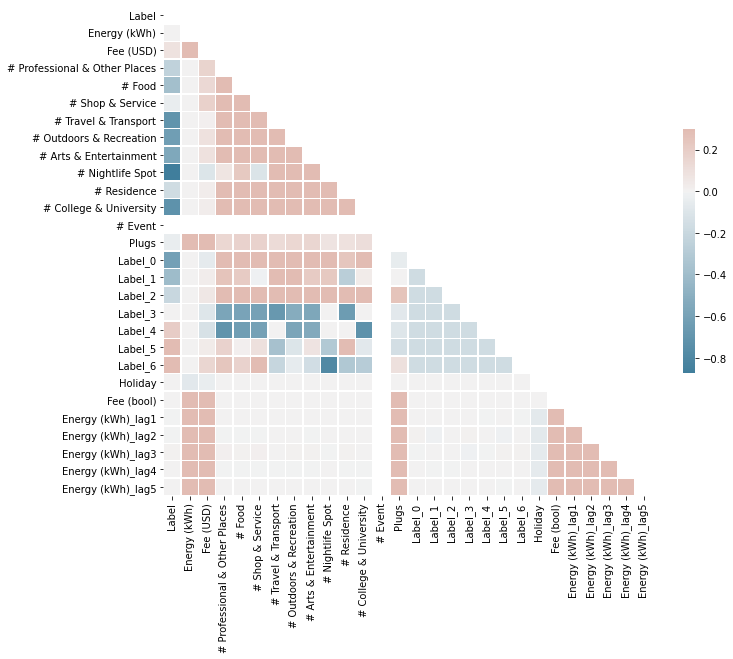

In [163]:

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
l = lags()

In [11]:
df = df.sort_index()

In [12]:
df = df.fillna(0)

In [10]:
df0 = df[df.Label == 0]

In [13]:
df0 = l.buildLaggedFeatures(df0, ["Energy (kWh)"])

In [14]:
df0

Label  Energy (kWh)  Fee (USD)  # Professional & Other Places  \
Date                                                                        
2011-08-03      0     26.878111   0.000000                            284   
2011-08-04      0     29.736456   0.000000                            284   
2011-08-05      0     31.489418   0.000000                            284   
2011-08-06      0     69.274091   0.000000                            284   
2011-08-07      0     13.397159   0.000000                            284   
...           ...           ...        ...                            ...   
2019-12-27      0     87.228903  27.005897                            284   
2019-12-28      0    111.825097  25.484103                            284   
2019-12-29      0     59.479000  13.670000                            284   
2019-12-30      0    116.131000  30.830000                            284   
2019-12-31      0    100.433000  23.100000                            284   

            # Food  # Shop & Service  # Travel & Transport  \
Date                                                         
2011-08-03     272               230                 218.0   
2011-08-04     272               230                 218.0   
2011-08-05     272               230                 218.0   
2011-08-06     272               230                 218.0   
2011-08-07     272               230                 218.0   
...            ...               ...                   ...   
2019-12-27     272               230                 218.0   
2019-12-28     272               230                 218.0   
2019-12-29     272               230                 218.0   
2019-12-30     272               230                 218.0   
2019-12-31     272               230                 218.0   

            # Outdoors & Recreation  # Arts & Entertainment  # Nightlife Spot  \
Date                                                                            
2011-08-03                      174                     129             121.0   
2011-08-04                      174                     129             121.0   
2011-08-05                      174                     129             121.0   
2011-08-06                      174                     129             121.0   
2011-08-07                      174                     129             121.0   
...                             ...                     ...               ...   
2019-12-27                      174                     129             121.0   
2019-12-28                      174                     129             121.0   
2019-12-29                      174                     129             121.0   
2019-12-30                      174                     129             121.0   
2019-12-31                      174                     129             121.0   

            ...  Year_Month_8  Year_Month_9  Year_Month_10  Year_Month_11  \
Date        ...                                                             
2011-08-03  ...             1             0              0              0   
2011-08-04  ...             1             0              0              0   
2011-08-05  ...             1             0              0              0   
2011-08-06  ...             1             0              0              0   
2011-08-07  ...             1             0              0              0   
...         ...           ...           ...            ...            ...   
2019-12-27  ...             0             0              0              0   
2019-12-28  ...             0             0              0              0   
2019-12-29  ...             0             0              0              0   
2019-12-30  ...             0             0              0              0   
2019-12-31  ...             0             0              0              0   

            Year_Month_12  Energy (kWh)_lag1  Energy (kWh)_lag2  \
Date                                                              
2011-08-03   

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df0.drop(columns=["Energy (kWh)"]), df0["Energy (kWh)"], shuffle=False)

In [16]:
regressor = LinearRegression().fit(X_train, y_train)

In [18]:
y_pred = regressor.predict(X_test)

In [30]:
r2_score(y_test, y_pred)

NameError: name 'y_test' is not defined

In [73]:
df[df.Label == 1]

Label  Energy (kWh)  Fee (USD)  # Professional & Other Places  \
Date                                                                        
2011-07-29      1     -1.016019   0.000000                       -1.54272   
2011-07-30      1     -1.016019   0.000000                       -1.54272   
2011-07-31      1     -1.016019   0.000000                       -1.54272   
2011-08-01      1     -1.016019   0.000000                       -1.54272   
2011-08-02      1     -1.016019   0.000000                       -1.54272   
...           ...           ...        ...                            ...   
2019-12-27      1      0.165662  21.882358                       -1.54272   
2019-12-28      1      0.241594  23.000000                       -1.54272   
2019-12-29      1     -0.116407  16.710000                       -1.54272   
2019-12-30      1      0.030917  19.440000                       -1.54272   
2019-12-31      1      0.139676  21.450000                       -1.54272   

              # Food  # Shop & Service  # Travel & Transport  \
Date                                                           
2011-07-29 -1.591402         -1.620294             -1.452644   
2011-07-30 -1.591402         -1.620294             -1.452644   
2011-07-31 -1.591402         -1.620294             -1.452644   
2011-08-01 -1.591402         -1.620294             -1.452644   
2011-08-02 -1.591402         -1.620294             -1.452644   
...              ...               ...                   ...   
2019-12-27 -1.591402         -1.620294             -1.452644   
2019-12-28 -1.591402         -1.620294             -1.452644   
2019-12-29 -1.591402         -1.620294             -1.452644   
2019-12-30 -1.591402         -1.620294             -1.452644   
2019-12-31 -1.591402         -1.620294             -1.452644   

            # Outdoors & Recreation  # Arts & Entertainment  # Nightlife Spot  \
Date                                                                            
2011-07-29                -1.240428               -1.411294               0.0   
2011-07-30                -1.240428               -1.411294               0.0   
2011-07-31                -1.240428               -1.411294               0.0   
2011-08-01                -1.240428               -1.411294               0.0   
2011-08-02                -1.240428               -1.411294               0.0   
...                             ...                     ...               ...   
2019-12-27                -1.240428               -1.411294               0.0   
2019-12-28                -1.240428               -1.411294               0.0   
2019-12-29                -1.240428               -1.411294               0.0   
2019-12-30                -1.240428               -1.411294               0.0   
2019-12-31                -1.240428               -1.411294               0.0   

            ...  Year_Month_3  Year_Month_4  Year_Month_5  Year_Month_6  \
Date        ...                                                           
2011-07-29  ...             0             0             0             0   
2011-07-30  ...             0             0             0             0   
2011-07-31  ...             0             0             0             0   
2011-08-01  ...             0             0             0             0   
2011-08-02  ...             0             0             0             0   
...         ...           ...           ...           ...           ...   
2019-12-27  ...             0             0             0             0   
2019-12-28  ...             0             0             0             0   
2019-12-29  ...             0             0             0             0   
2019-12-30  ...             0             0             0             0   
2019-12-31  ...             0             0             0             0   

            Year_Month_7  Year_Month_8  Year_Month_9  Year_Month_10  \
Date                                                                  
2011-

In [75]:
#l.buildLaggedFeatures(df[df.Label == 6], ["Energy (kWh)"])

Label  Energy (kWh)  Fee (USD)  # Professional & Other Places  \
Date                                                                        
2011-08-03      6     -1.016019   0.000000                       0.553454   
2011-08-04      6     -1.016019   0.000000                       0.553454   
2011-08-05      6     -1.016019   0.000000                       0.553454   
2011-08-06      6     -1.016019   0.000000                       0.553454   
2011-08-07      6     -1.016019   0.000000                       0.553454   
...           ...           ...        ...                            ...   
2019-12-27      6      0.285541  40.601599                       0.553454   
2019-12-28      6     -0.165968  25.026806                       0.553454   
2019-12-29      6      0.363327  25.590000                       0.553454   
2019-12-30      6      0.775585  40.261895                       0.553454   
2019-12-31      6     -0.040578  19.568105                       0.553454   

              # Food  # Shop & Service  # Travel & Transport  \
Date                                                           
2011-08-03  0.394013          1.028489             -0.634801   
2011-08-04  0.394013          1.028489             -0.634801   
2011-08-05  0.394013          1.028489             -0.634801   
2011-08-06  0.394013          1.028489             -0.634801   
2011-08-07  0.394013          1.028489             -0.634801   
...              ...               ...                   ...   
2019-12-27  0.394013          1.028489             -0.634801   
2019-12-28  0.394013          1.028489             -0.634801   
2019-12-29  0.394013          1.028489             -0.634801   
2019-12-30  0.394013          1.028489             -0.634801   
2019-12-31  0.394013          1.028489             -0.634801   

            # Outdoors & Recreation  # Arts & Entertainment  # Nightlife Spot  \
Date                                                                            
2011-08-03                -0.242096               -0.260547         -1.296055   
2011-08-04                -0.242096               -0.260547         -1.296055   
2011-08-05                -0.242096               -0.260547         -1.296055   
2011-08-06                -0.242096               -0.260547         -1.296055   
2011-08-07                -0.242096               -0.260547         -1.296055   
...                             ...                     ...               ...   
2019-12-27                -0.242096               -0.260547         -1.296055   
2019-12-28                -0.242096               -0.260547         -1.296055   
2019-12-29                -0.242096               -0.260547         -1.296055   
2019-12-30                -0.242096               -0.260547         -1.296055   
2019-12-31                -0.242096               -0.260547         -1.296055   

            ...  Year_Month_8  Year_Month_9  Year_Month_10  Year_Month_11  \
Date        ...                                                             
2011-08-03  ...             1             0              0              0   
2011-08-04  ...             1             0              0              0   
2011-08-05  ...             1             0              0              0   
2011-08-06  ...             1             0              0              0   
2011-08-07  ...             1             0              0              0   
...         ...           ...           ...            ...            ...   
2019-12-27  ...             0             0              0              0   
2019-12-28  ...             0             0              0              0   
2019-12-29  ...             0             0              0              0   
2019-12-30  ...             0             0              0              0   
2019-12-31  ...             0             0              0              0   

            Year_Month_12  Energy (kWh)_lag1  Energy (kWh)_lag2  \
Date                                                  

In [13]:
def predict(label):
    l = lags()
    
    df0 = df[df.Label == label]
    df0 = l.buildLaggedFeatures(df0, ["Energy (kWh)"])
    
    X_train, y_train = df0.iloc[:2500].drop(columns=["Energy (kWh)"]), df0.iloc[:2500]["Energy (kWh)"]
    X_test, y_test = df0.iloc[2500:].drop(columns=["Energy (kWh)"]), df0.iloc[2500:]["Energy (kWh)"]
    
    regressor = LinearRegression().fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    return y_test, y_pred

In [41]:
def plot_preds(test, pred, ax, cluster):
    test = test * sigma + mu
    pred = pred * sigma + mu
    x = np.linspace(min(test), max(test), 1000)
    ax.scatter(test, pred, color = cmap(0.8))
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.set_title(f'Cluster: {cluster}')
    ax.text(10,max(pred), r'$r^2 = $' + str(np.round(r2_score(test, pred), 3)), fontsize = 15)
    ax.text(10,max(pred) - max(pred)*0.1, f'RMSE = {np.round(np.sqrt(mean_squared_error(test, pred)),2)}',fontsize = 15)
    ax.plot(x,x, color = rmap(0.8))
    


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

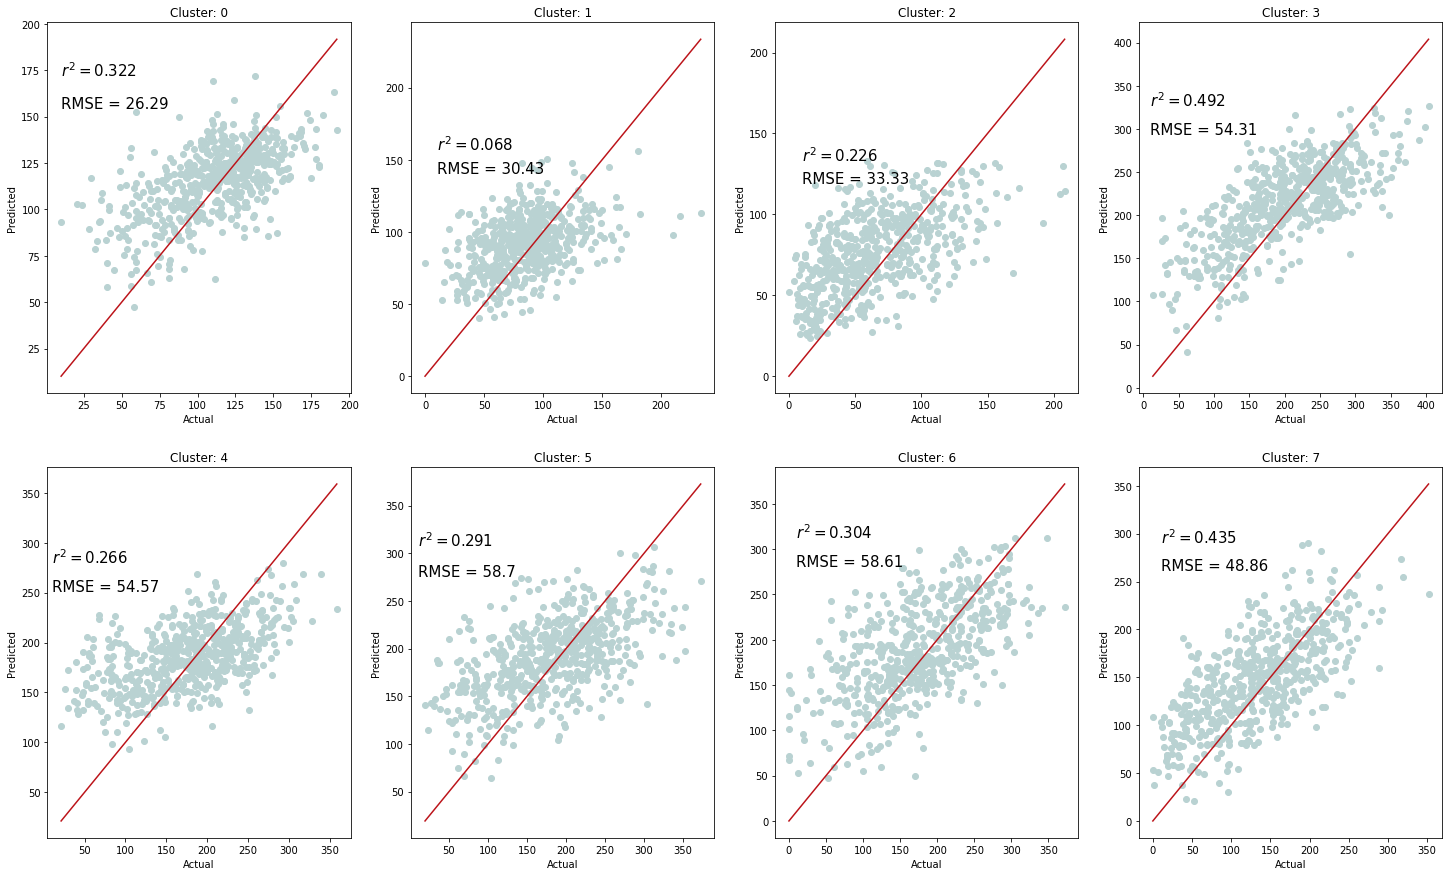

In [42]:
fig, ax = plt.subplots(2, 4, figsize = (25,15))
test, pred = predict(0)
plot_preds(test, pred, ax[0][0],0)

test, pred = predict(1)
plot_preds(test, pred, ax[0][1],1)

test, pred = predict(2)
plot_preds(test, pred, ax[0][2],2)

test, pred = predict(3)
plot_preds(test, pred, ax[0][3],3)

test, pred = predict(4)
plot_preds(test, pred, ax[1][0],4)

test, pred = predict(5)
plot_preds(test, pred, ax[1][1],5)

test, pred = predict(6)
plot_preds(test, pred, ax[1][2],6)

test, pred = predict(7)
plot_preds(test, pred, ax[1][3],7)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

26.922

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

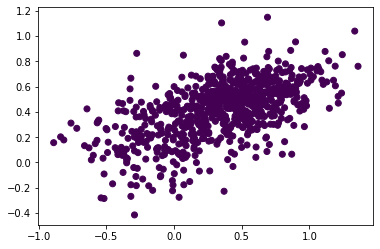

In [18]:
plt.scatter(y_test,y_pred, c = X_test.Label)
plt.show()

In [173]:
fig = plt.figure(figsize = (12,8))
plt.plot(y_train.index, y_train, alpha = 0.4)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
np.sqrt(mean_squared_error(y_test,y_pred))

<IPython.core.display.Javascript object>

83.45833713901689

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

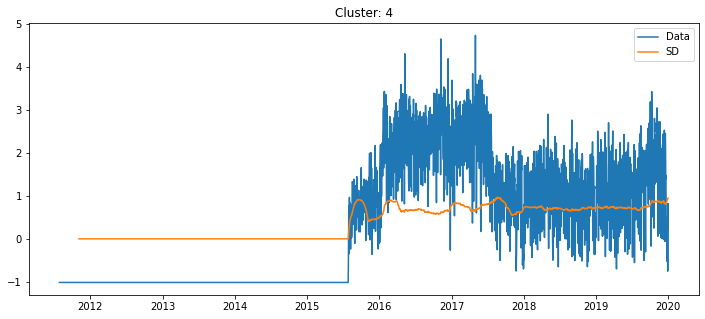

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

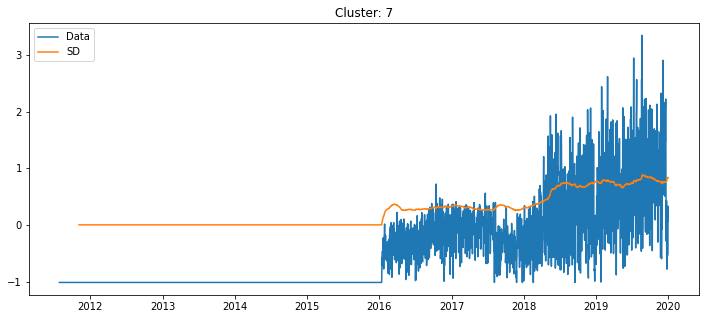

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

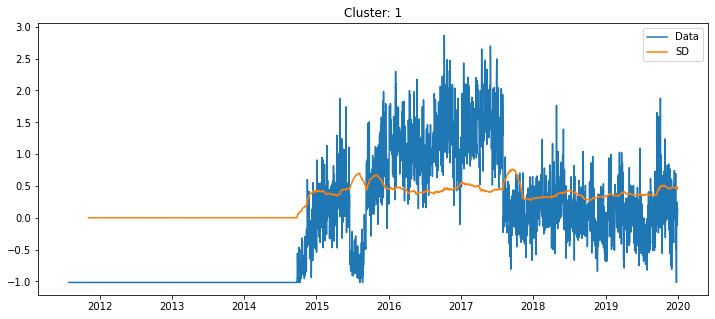

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

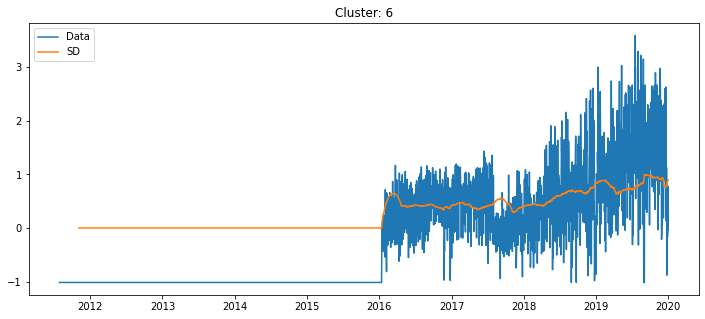

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

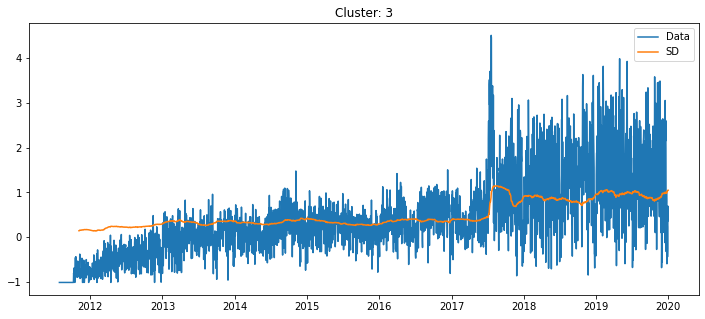

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

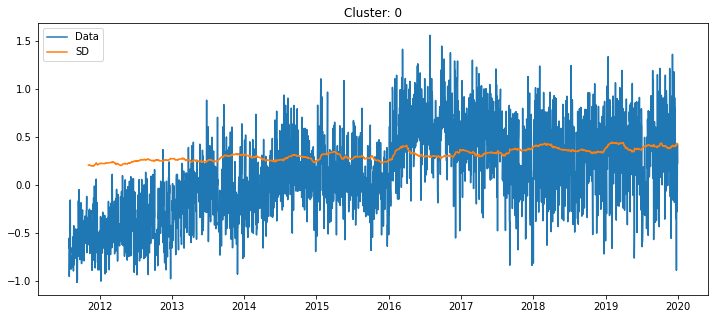

In [18]:
for i in df.Label.unique():
    fig = plt.figure(figsize = (12, 5))
    ts = df["Energy (kWh)"][df.Label == i]
    rolling_std = ts.rolling(window = 100).std()
    plt.plot(ts, label = "Data")
    plt.plot(rolling_std, label = "SD")
    plt.legend()
    plt.title(f"Cluster: {i}")
    plt.show()
    



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

------------------------------
Label: 4
-0.18900852769262588


<IPython.core.display.Javascript object>

0.8498183355897804
------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

------------------------------
Label: 7
-0.3372054597225924


<IPython.core.display.Javascript object>

0.9354122679375223
------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

------------------------------
Label: 2
-4.322439398978557


<IPython.core.display.Javascript object>

1.0410319156238494
------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

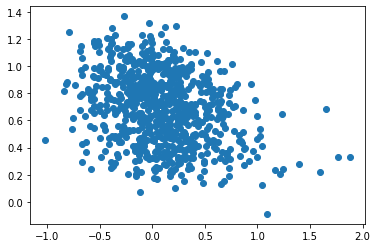

------------------------------
Label: 1
-3.2171636834137756


<IPython.core.display.Javascript object>

0.8117361472807517
------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

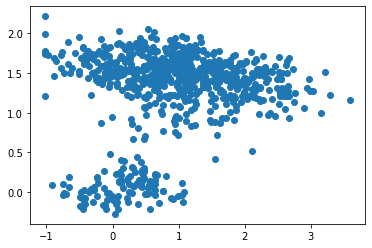

------------------------------
Label: 6
-0.2934761702395019


<IPython.core.display.Javascript object>

0.9916989308429149
------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

------------------------------
Label: 5
-0.17323148968808577


<IPython.core.display.Javascript object>

0.9074636642190305
------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

------------------------------
Label: 3
-0.2761485141917974


<IPython.core.display.Javascript object>

1.0631608738019052
------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

------------------------------
Label: 0
-0.27398928813519685


<IPython.core.display.Javascript object>

0.4483435681324864
------------------------------


In [27]:
for i in df.Label.unique():
    x_tr, y_tr = X_train[X_train.Label == i][y_train[X_train.Label == i] != 0], y_train[X_train.Label == i][y_train[X_train.Label == i] != 0]
    x_te, y_te = X_test[X_test.Label == i][y_test[X_test.Label == i] != 0], y_test[X_test.Label == i][y_test[X_test.Label == i] != 0]
    reg = LinearRegression().fit(x_tr,y_tr)
    y_pred = regressor.predict(x_te)
    plt.scatter(y_te,y_pred)
    plt.show()
    print("-"*30)
    print(f'Label: {i}')
    print(r2_score(y_test[X_test.Label == i], y_pred))
    print(np.sqrt(mean_squared_error(y_test[X_test.Label == i], y_pred)))
    print("-"*30)
